In [ ]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import numpy as np
import torch
from google.colab import drive
drive.mount('/content/drive/')

test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/data.csv')
test_df

Mounted at /content/drive/


,dry_tone_path,wet_tone_path,Invert,Delay,LadderFilter,Clipping,HighpassFilter,HighShelfFilter,Distortion,LowpassFilter,PeakFilter,Gain,PitchShift,Reverb,LowShelfFilter,Chorus,NoiseGate
0,data/dry_tones/Electric1.wav,data/wet_tones/output_0.wav,{'Order': 0},"{'delay_seconds': 1.3614898033746186, 'feedbac...","{'cutoff_hz': 783.6108768162218, 'resonance': ...","{'threshold_db': 0.48666722066094703, 'Order': 3}","{'cutoff_frequency_hz': 3308.5759527065475, 'O...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,data/dry_tones/Electric1.wav,data/wet_tones/output_1.wav,NaN,"{'delay_seconds': 0.1927648105708213, 'feedbac...","{'cutoff_hz': 2305.706285786796, 'resonance': ...",NaN,NaN,"{'cutoff_frequency_hz': 17333.970649110797, 'g...","{'drive_db': 4.579819729729877, 'Order': 3}","{'cutoff_frequency_hz': 764.7133601145308, 'Or...","{'cutoff_frequency_hz': 202.29571406259643, 'g...",NaN,NaN,NaN,NaN,NaN,NaN
2,data/dry_tones/Electric1.wav,data/wet_tones/output_2.wav,NaN,NaN,NaN,NaN,NaN,"{'cutoff_frequency_hz': 17009.488686414345, 'g...",NaN,NaN,NaN,"{'gain_db': -10.469686878909272, 'Order': 0}","{'semitones': 10.856918900900709, 'Order': 2}",NaN,NaN,NaN,NaN
3,data/dry_tones/Electric1.wav,data/wet_tones/output_3.wav,NaN,NaN,NaN,NaN,NaN,"{'cutoff_frequency_hz': 12617.530880029155, 'g...",NaN,NaN,NaN,"{'gain_db': -52.81402513175436, 'Order': 2}",NaN,"{'room_size': 0.24940682162283423, 'damping': ...","{'cutoff_frequency_hz': 12779.58556866978, 'ga...",NaN,NaN
4,data/dry_tones/Electric1.wav,data/wet_tones/output_4.wav,NaN,"{'delay_seconds': 0.07682114971715404, 'feedba...","{'cutoff_hz': 8118.076809416229, 'resonance': ...",NaN,NaN,NaN,"{'drive_db': 3.384824047397439, 'Order': 6}",NaN,"{'cutoff_frequency_hz': 11015.864343159727, 'g...",NaN,NaN,NaN,"{'cutoff_frequency_hz': 19336.672149404934, 'g...","{'rate_hz': 2.7965097004899944, 'depth': 0.803...","{'threshold_db': -67.36763351929608, 'attack_m..."


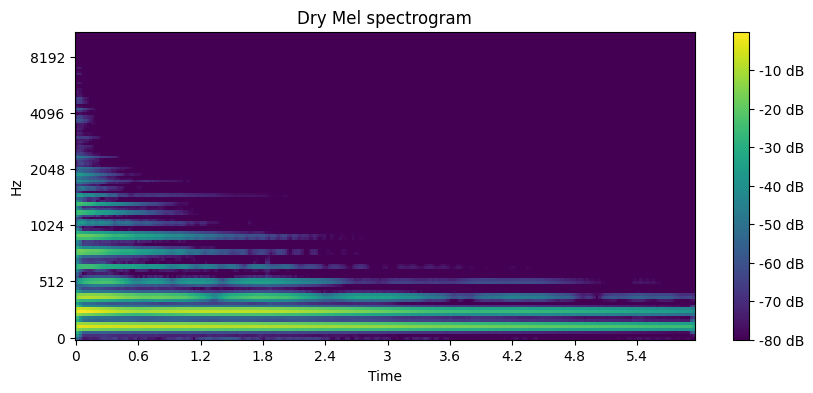

In [ ]:
y, sr = librosa.load('/content/drive/My Drive/Colab Notebooks/data/dry_tones/Electric1.wav')
dry_mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
dry_mel_spectrogram_db = librosa.power_to_db(dry_mel_spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(dry_mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Dry Mel spectrogram')
plt.show()

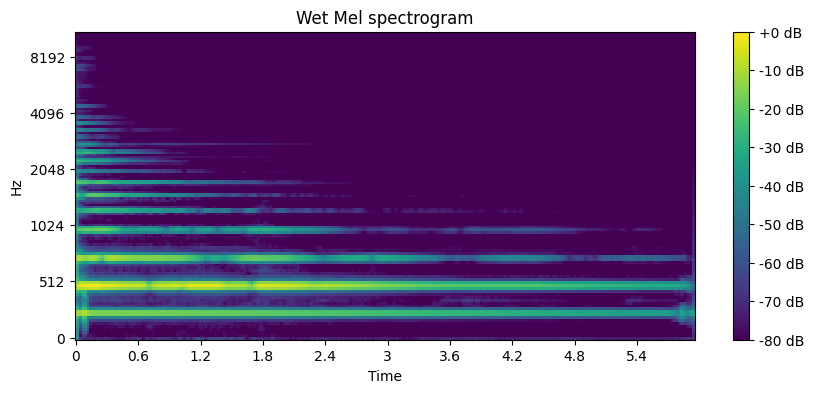

In [ ]:
y, sr = librosa.load('/content/drive/My Drive/Colab Notebooks/data/wet_tones/output_2.wav')
dry_mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
dry_mel_spectrogram_db = librosa.power_to_db(dry_mel_spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(dry_mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Wet Mel spectrogram')
plt.show()

# Spectrogram Inputs

In [ ]:
import librosa
import numpy as np
from transformers import AutoFeatureExtractor

In [ ]:
# loading audio file
audio_path = '/content/drive/My Drive/Colab Notebooks/data/dry_tones/Electric1.wav'
y, sr = librosa.load(audio_path, sr=None)

# generate mel spectrogram
feature_extractor = AutoFeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
spectrogram = feature_extractor(y, return_tensors="pt")

# with multiple audio files, we can process them in a loop
# and stack the spectrograms or process them one by one

It is strongly recommended to pass the `sampling_rate` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


# Getting embeddings

In [ ]:
from transformers import ASTForAudioClassification

model = ASTForAudioClassification.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

In [ ]:
from transformers import ASTModel

# AST model without the classification head
model = ASTModel.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

with torch.no_grad():
    outputs = model(spectrogram['input_values'])

# now outputs.last_hidden_state should be available
embeddings = outputs.pooler_output
embeddings.shape

torch.Size([1, 768])

# (unfinished) Multiple Embeddings for Multiple Sectrograms

In [ ]:
# for multiple spectrograms
all_embeddings = []
for spec in spectrograms_list:  # once we create list
    with torch.no_grad():
        outputs = model(spec['input_values'])
    embedding = torch.mean(outputs.last_hidden_state, dim=1)
    all_embeddings.append(embedding)

# all embeddings stacked
all_embeddings = torch.stack(all_embeddings)

NameError: name 'spectrograms_list' is not defined